In [1]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

# Laden des Datensatzes

In [2]:
digits = load_digits(n_class=6)
digits.data.shape

(1083, 64)

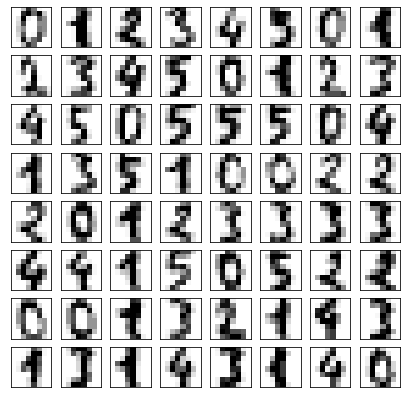

In [3]:
fig, axes = plt.subplots(figsize=[7,7], nrows=8, ncols=8)
for ax, d in zip(axes.flatten(), digits.data[:8*8]):
    ax.imshow(d.reshape(8,8), cmap="Greys")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.show()

In [4]:
def plot_transformed_data(data_transformed):
    fig, ax = plt.subplots(figsize=[5,4])
    plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c = digits.target, edgecolor="none", alpha=0.5, 
               cmap=plt.cm.get_cmap("hsv", 6))
    plt.xlabel("principal component 1")
    plt.ylabel("principal component 2")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2, random_state=0)
pca_data_trf = pca.fit_transform(digits.data)
digits.data.shape, pca_data_trf.shape

((1083, 64), (1083, 2))

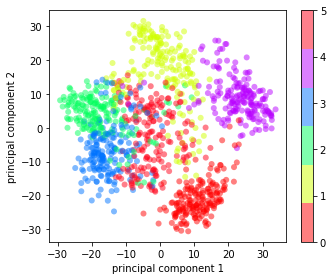

In [7]:
plot_transformed_data(pca_data_trf)

# tSNE

In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, learning_rate="auto", init='pca', random_state=0)
tsne_data_trf = tsne.fit_transform(digits.data)
digits.data.shape, tsne_data_trf.shape

C:\Users\edgar\anaconda3\envs\env_study\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


((1083, 64), (1083, 2))

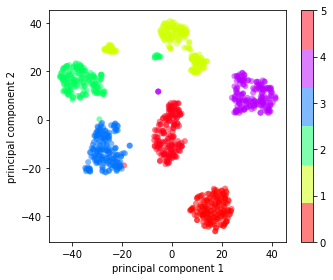

In [10]:
plot_transformed_data(tsne_data_trf)

# Isomap

In [11]:
from sklearn.manifold import Isomap

In [12]:
isomap = Isomap(n_components=2, n_neighbors=30)
isomap_data_trf = isomap.fit_transform(digits.data)
digits.data.shape, isomap_data_trf.shape

((1083, 64), (1083, 2))

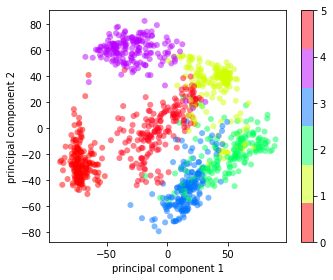

In [13]:
plot_transformed_data(isomap_data_trf)

# LLE 

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

In [15]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30, method="standard")
lle_data_trf = lle.fit_transform(digits.data)
digits.data.shape, lle_data_trf.shape

((1083, 64), (1083, 2))

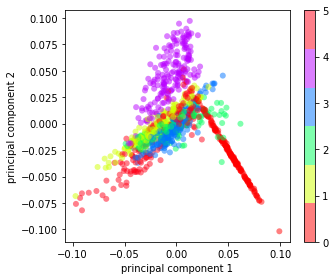

In [16]:
plot_transformed_data(lle_data_trf)

# Vergleich der Methoden
Besonders beim Verfahren tSNE ist zu beobachten, dass die Separierung sehr eindeutig ist. Die Punkte für eine andere Klasse liegen verhältnismäßig sehr weit entfernt und die Dichter der Punkte, die zu einer Klasse gehören ist sehr hoch. Im Vergleich zu den anderen Methoden kommt es quasi zu gar keinen Überschneidungen. Beim Verfahren LLE kommt es zu relativ vielen Überschneidungen und die Punkte sind relativ linear aufgestellt. Demzufolge funktioniert hier wohl tSNE am besten und LLE am schlechtsten. \
Ein weiter Faktor könnte evtl. bei größeren Datenmengen die Ausführungszeit der Verfahren auf diese Daten sein. Wenn ein genaueres Verfahren aber ungleich mehr Zeit benötigt ist  evtl. in der Praxis doch ein annährend "guter" aber dafür schneller Algorithmus vorzuziehen.

In [18]:
digits.target

array([0, 1, 2, ..., 4, 4, 0])